In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
class PriceNegotiationChatbot:
    def __init__(self, data):
        # Prepare the data
        self.data = data
        self.model = SVR(kernel='linear')
        self.train_model()

    def train_model(self):
        # Prepare features (X) and labels (y)
        X = self.data[['original_price']].values
        y = self.data['negotiated_price'].values

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        self.model.fit(X_train, y_train)
        print("Model trained successfully.")

    def suggest_price(self, proposed_price):
        predicted_price = self.model.predict([[proposed_price]])[0]
        return predicted_price

    def plot_prices(self, original_price, proposed_price, suggested_price, product_name):
        # Create a bar graph for individual negotiation
        prices = [original_price, proposed_price, suggested_price]
        labels = ['Original Price', 'Proposed Price', 'Suggested Price']
        
        plt.figure(figsize=(8, 5))
        plt.bar(labels, prices, color=['blue', 'orange', 'green'])
        plt.title(f'Price Comparison for {product_name}')
        plt.ylabel('Price in $')
        plt.ylim(0, max(prices) + 100)  # Set y-axis limit for better visibility
        plt.grid(axis='y')

        # Show the plot
        plt.show()

    def plot_price_summary(self):
        # Create a bar chart for products with highest and lowest prices
        plt.figure(figsize=(10, 6))
        plt.bar(self.data['product_name'], self.data['original_price'], color='skyblue')
        plt.title('Product Prices')
        plt.ylabel('Original Price in $')
        plt.xticks(rotation=45)
        plt.grid(axis='y')

        # Highlight highest and lowest priced products
        highest_price_product = self.data.loc[self.data['original_price'].idxmax()]
        lowest_price_product = self.data.loc[self.data['original_price'].idxmin()]
        
        plt.annotate(f'Highest: {highest_price_product["product_name"]} (${highest_price_product["original_price"]})',
                     xy=(highest_price_product.name, highest_price_product["original_price"]),
                     xytext=(highest_price_product.name, highest_price_product["original_price"] + 50),
                     arrowprops=dict(arrowstyle='->', color='red'), color='red')

        plt.annotate(f'Lowest: {lowest_price_product["product_name"]} (${lowest_price_product["original_price"]})',
                     xy=(lowest_price_product.name, lowest_price_product["original_price"]),
                     xytext=(lowest_price_product.name, lowest_price_product["original_price"] - 50),
                     arrowprops=dict(arrowstyle='->', color='green'), color='green')

        # Show the plot
        plt.show()

In [3]:
data = pd.DataFrame({
    'product_name': [
        'Smartphone', 'Laptop', 'Headphones', 'Smartwatch', 'Camera'
    ],
    'original_price': [
        500, 1200, 150, 250, 800
    ],
    'negotiated_price': [
        450, 1100, 120, 230, 700
    ]
})

In [9]:
chatbot = PriceNegotiationChatbot(data)

Model trained successfully.


In [5]:
print("Welcome to the price negotiation chatbot!")

Welcome to the price negotiation chatbot!


Choose a product from the following: Smartphone, Laptop, Headphones, Smartwatch, Camera (or type 'exit' to quit): Laptop
You selected: Laptop (Original price: $1200.00)
What price are you willing to pay for Laptop? (Type 'exit' to end negotiation): 1000
Based on your offer of $1000.00, we can suggest a negotiated price of: $871.08


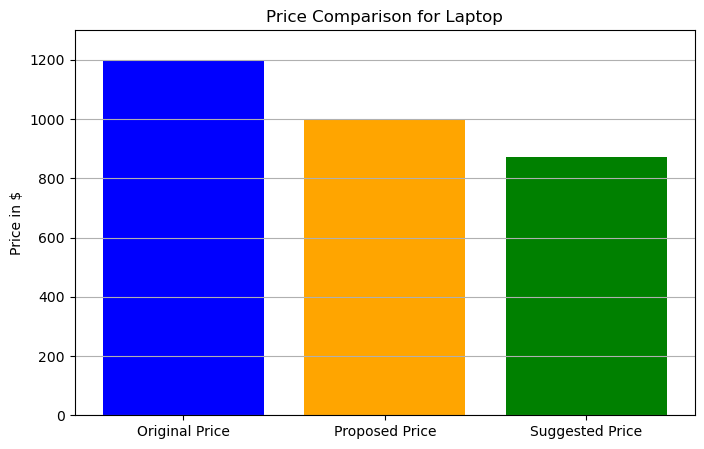

What price are you willing to pay for Laptop? (Type 'exit' to end negotiation): exit
Negotiation ended.
Choose a product from the following: Smartphone, Laptop, Headphones, Smartwatch, Camera (or type 'exit' to quit): exit
Negotiation ended.


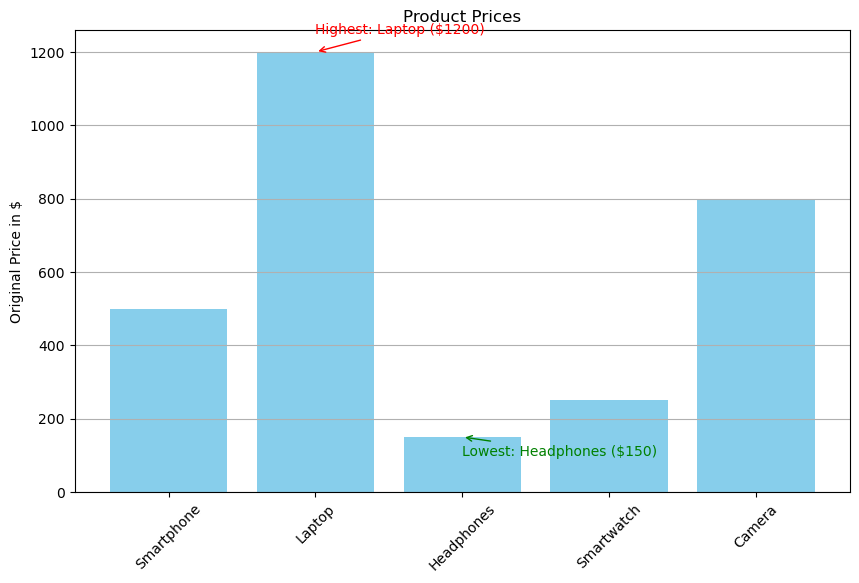

In [10]:
while True:
    product_choice = input("Choose a product from the following: Smartphone, Laptop, Headphones, Smartwatch, Camera (or type 'exit' to quit): ")

    if product_choice.lower() == 'exit':
        print("Negotiation ended.")
        break

    if product_choice not in data['product_name'].values:
        print("Invalid product. Please choose from the list.")
        continue

    original_price = data.loc[data['product_name'] == product_choice, 'original_price'].values[0]
    print(f"You selected: {product_choice} (Original price: ${original_price:.2f})")

    while True:
        user_input = input(f"What price are you willing to pay for {product_choice}? (Type 'exit' to end negotiation): ")

        if user_input.lower() == 'exit':
            print("Negotiation ended.")
            break

        try:
            proposed_price = float(user_input)
            suggested_price = chatbot.suggest_price(proposed_price)
            print(f"Based on your offer of ${proposed_price:.2f}, we can suggest a negotiated price of: ${suggested_price:.2f}")
            
            # Plot the prices
            chatbot.plot_prices(original_price, proposed_price, suggested_price, product_choice)
            
        except ValueError:
            print("Please enter a valid number.")

# After negotiation, plot the price summary
chatbot.plot_price_summary()